<a href="https://colab.research.google.com/github/Joniald/Colaboratory/blob/main/fashion_mnist_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The Fashion-MNIST dataset

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
assert x_train.shape == (60000, 28, 28), "Oh no! X_train failed"
assert x_test.shape == (10000, 28, 28), "Oh no! X_test failed"
assert y_train.shape == (60000,), "Oh no! y_train failed"
assert y_test.shape == (10000,), "Oh no! y_test failed"

In [5]:
import pandas as pd
d = {"Description":["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Boot"]}
dataset_description = pd.DataFrame(data=d)

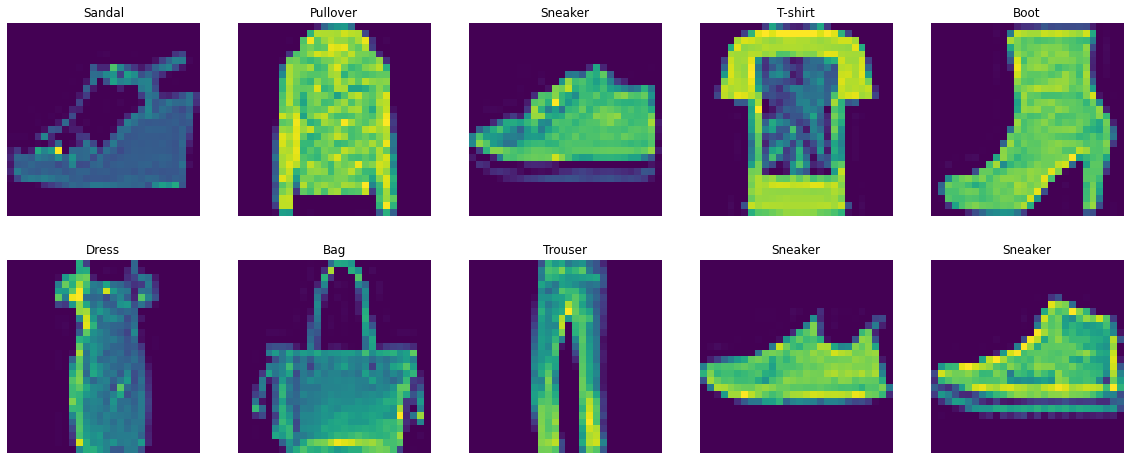

In [6]:
import numpy as np
import random
plt.figure(figsize=(20,8))
for i in range(10):
  plt.subplot(2,5,i+1)
  rand_index = random.choice(range(len(x_train)))
  plt.imshow(x_train[rand_index])
  plt.title(dataset_description.Description[y_train[rand_index]])
  plt.axis(False)

In [7]:
x_train = x_train / 255.0
x_test = x_test / 255.0

## The training model

In [8]:
tf.random.set_seed(42)

model_01 = tf.keras.Sequential([
       tf.keras.layers.Flatten(input_shape=(28,28)),                         
       tf.keras.layers.Dense(128, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0005)),
       tf.keras.layers.Dropout(0.2),
       tf.keras.layers.Dense(64, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0005)),
       tf.keras.layers.Dropout(0.2),
       tf.keras.layers.Dense(10, activation='softmax')                        
])

model_01.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=tf.keras.metrics.SparseCategoricalAccuracy()
)

history = model_01.fit(x_train, y_train, epochs=10, verbose=0)

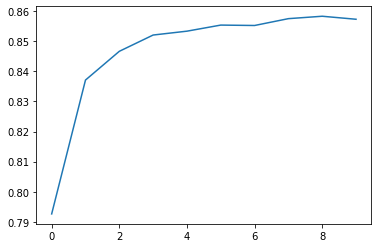

In [9]:
plt.plot(history.epoch, history.history['sparse_categorical_accuracy'])

In [10]:
model_01.evaluate(x_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.4788 - sparse_categorical_accuracy: 0.8546


[0.4788319766521454, 0.8546000123023987]

In [11]:
y_pred = model_01.predict(x_test)

In [12]:
print(y_pred[:2])
yy_pred =tf.argmax(y_pred, axis=1)
print(yy_pred[:2])

[[5.45951407e-05 3.25610963e-05 4.85361397e-06 1.16023575e-05
  8.53562960e-06 2.24529020e-02 2.66089919e-05 1.02001920e-01
  4.38786141e-04 8.74967575e-01]
 [1.02578915e-05 1.79697537e-08 9.90310013e-01 2.25541811e-07
  6.67207781e-03 5.49113732e-09 3.00712860e-03 8.21644077e-13
  3.87783160e-07 5.19752123e-11]]
tf.Tensor([9 2], shape=(2,), dtype=int64)


## Evaluate Metrics

In [13]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
print(confusion_matrix(y_test, yy_pred))
print(recall_score(y_test, yy_pred, average='macro'))
print(precision_score(y_test, yy_pred, average='macro'))

[[872   1  27  47   7   0  33   0  13   0]
 [  2 950   6  33   6   0   1   0   2   0]
 [ 16   0 824  13 130   0  14   0   3   0]
 [ 24   4  13 914  33   0   9   0   3   0]
 [  0   0 117  41 831   0  10   0   1   0]
 [  0   0   0   0   0 950   0  27   1  22]
 [213   1 162  44 199   0 367   0  14   0]
 [  0   0   0   0   0  32   0 933   0  35]
 [  3   1  18   8   8   2   1   5 954   0]
 [  0   0   0   0   0   7   0  41   1 951]]
0.8545999999999999
0.862076108835667


In [14]:
def randomPredictinShow(x_train, model, y_train):

   Description = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Boot"]

   plt.figure(figsize=(20,8))

   for i in range(8):
      rand_id = np.random.randint(len(x_train), size=1)
      y_pred = model_01.predict(x_train[rand_id])
      yy_pred = np.argmax(y_pred, axis=1)
      plt.subplot(2,4,i+1)
      plt.imshow(x_train[rand_id].reshape(28,28))
      plt.axis(False)
      if Description[y_train[rand_id].item()] == Description[yy_pred.item()]:
            plt.title("True value: " + Description[y_train[rand_id].item()] + " // " + "Prediction: " + Description[yy_pred.item()], color='green')
      else:
            plt.title("True value: " + Description[y_train[rand_id].item()] + " // " + "Prediction: " + Description[yy_pred.item()], color='red')


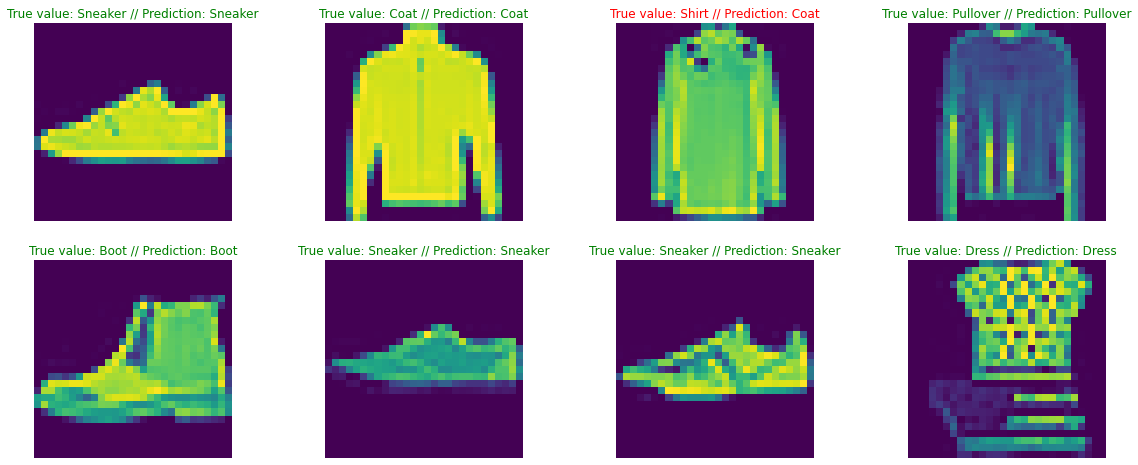

In [15]:
randomPredictinShow(x_train, model_01, y_train)

## Layers Distribution

In [32]:
layers = model_01.layers
layers

In [38]:
weights, biases = layers[5].get_weights()

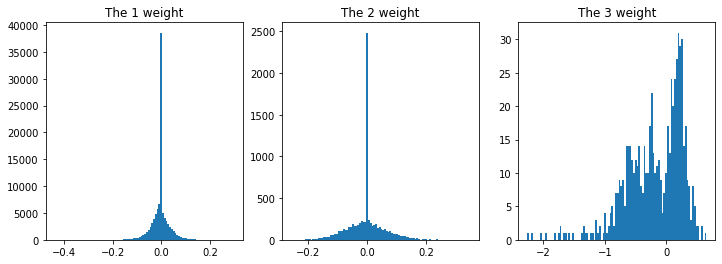

In [43]:
j = 0
plt.figure(figsize=(12,4))
for i in np.arange(1,6,2):
  weights, biases = layers[i].get_weights()
  weight_01 = tf.reshape(weights, shape=(weights.shape[0]*weights.shape[1],1))
  weight_1 = tf.squeeze(weight_01, axis=-1)
  
  j = j + 1
  plt.subplot(1,3,j)
  plt.hist(weight_1.numpy(), bins=100)
  plt.title("The {} weight".format(j))

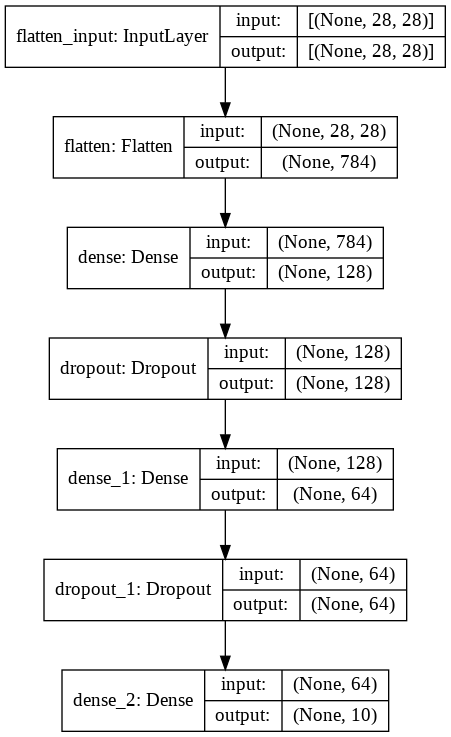

In [46]:
from tensorflow.keras.utils import plot_model
plot_model(model_01, show_shapes=True)